In [37]:
import pre_processing
import statistics_calculation
import visualization
import pandas as pd
import importlib

# Pre Process Data

In [38]:
importlib.reload(pre_processing)
CSV_FNAME = 'Mastersheet_training.csv'
master_df = pre_processing.load_and_preprocess_data(CSV_FNAME)

# ReOrganize Data

In [39]:
importlib.reload(statistics_calculation)
Summed_MD_res_data, MD_data_per_player = statistics_calculation.calculate_average_distance_per_player(master_df)

# Visualize Data Per MD 

In [47]:
importlib.reload(visualization)
visualization.plot_1d_histogram_per_day(MD_data_per_player)


# Estimation

In [54]:
data = MD_data_per_player.loc[MD_data_per_player['Day'] == 'MD+3']['Total Distance']
importlib.reload(statistics_calculation)
mu_estimate, sigma_estimate = statistics_calculation.estimate_normal_parameters(data)
print(f"Estimated mu: {mu_estimate}, Estimated sigma: {sigma_estimate}")


Estimated mu: 2828.970297029703, Estimated sigma: 664.3516523119474


# Visualize The estimation parameter

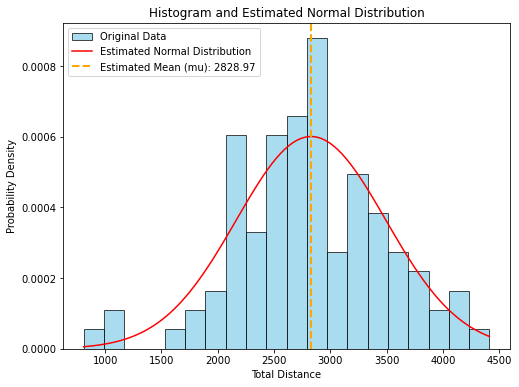

In [55]:
importlib.reload(visualization)

visualization.visualize_data_and_estimation(data, mu_estimate, sigma_estimate)


# Visualize All Data MD 

In [42]:
importlib.reload(visualization)
importlib.reload(pre_processing)
distance_data_ordered = pre_processing.reorder_dataframe(Summed_MD_res_data)
visualization.visualize_distribution(distance_data_ordered, MD_data_per_player, 'Total Distance')

In [ ]:
distance_data_ordered

In [92]:
importlib.reload(statistics_calculation)
importlib.reload(visualization)
distance_data_per_player, summed_data_per_player = statistics_calculation.calculate_average_distance_per_player(
    master_df)
distance_data_ordered_per_player = pre_processing.reorder_dataframe(distance_data_per_player)
visualization.visualize_total_distance_distribution(distance_data_ordered_per_player, summed_data_per_player)

In [61]:
last_practice_csv = 'test.csv'
last_practice_df = pre_processing.load_and_preprocess_data(last_practice_csv)
total_distance_last_practice = last_practice_df['Total Distance'].sum()
print(total_distance_last_practice)

32534.0


In [62]:
importlib.reload(statistics_calculation)
next_day = 'MD-3'  # Replace with your function to calculate the next day
desired_intensity, percentile_last_practice, desired_percentile_next_practice = statistics_calculation.calculate_next_intensity(
    last_practice_df, distance_data_ordered, next_day)
print(f"The desired intensity for the next practice is {desired_intensity:.2f} distance units.")

The desired intensity for the next practice is 62951.37 distance units.


In [63]:
percentile_last_practice
desired_percentile_next_practice
desired_intensity

62951.368279381306

In [64]:
importlib.reload(visualization)
next_day = 'MD-3'  # Replace with your function to calculate the next day

visualization.visualize_stats_go(last_practice_df, distance_data_ordered, next_day, desired_intensity)
